Introduction to Linear Regression
===========================

In this Jupyter Notebook...

* Model experimental data for the bandgap of PbS quantum dots versus size

* Apply linear regression model and polynomial fit to the data

* Demonstrate the use of linear regression on the log of the data and report the power-law slope

Import the necessary modules

In [1]:
import numpy as np
import sys
sys.path.append('../')
import matplotlib.pyplot as plt

Load the data [extracted from Fig 6 of Segets, Doris, et al. "Determination of the quantum dot band gap dependence on particle size from optical absorbance and transmission electron microscopy measurements." Acs Nano 6.10 (2012): 9021-9032.]

In [2]:
data = np.loadtxt(open("data/pbs_bandgap.csv", "rb"), delimiter=",", skiprows=0)
size = data[:,0]
bandgap = data[:,1]

Plot the data

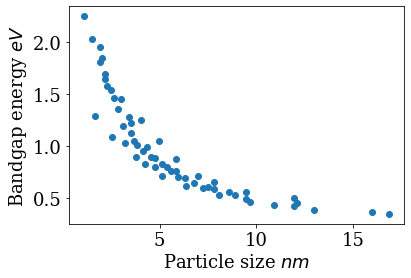

In [3]:
plt.figure()
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

plt.scatter(size, bandgap)

plt.xlabel('Particle size $nm$')
plt.ylabel('Bandgap energy $eV$')

plt.show()

Determine the coefficients for a linear regression model

In [4]:
num_exp = len(size)
t = np.sum(size) / num_exp
t2 = np.sum(size ** 2) / num_exp
m = np.sum(bandgap) / num_exp
mt = np.sum(bandgap * size) / num_exp

In [5]:
a0 = (m * t2 - mt * t) / (t2 - t ** 2)
a1 = (mt - m * t) / (t2 - t ** 2)

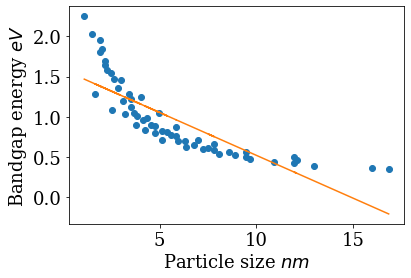

In [6]:
plt.figure()
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

plt.scatter(size, bandgap)
plt.plot(size, a0 + a1 * size, c='C1')

plt.xlabel('Particle size $nm$')
plt.ylabel('Bandgap energy $eV$')

plt.show()

Perform a polynomial fit to the data with user-defined order (default to p = 2)

In [7]:
a_poly = np.polyfit(size, bandgap, 2)
print(a_poly)

[ 0.01262178 -0.30397865  2.14416093]


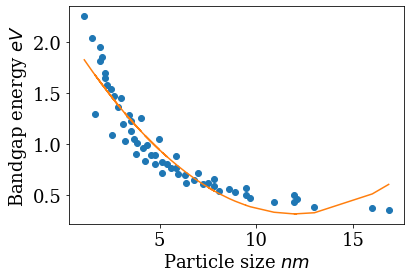

In [8]:
plt.figure()
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

plt.scatter(size, bandgap)
plt.plot(size, np.polyval(a_poly, size), c='C1')

plt.xlabel('Particle size $nm$')
plt.ylabel('Bandgap energy $eV$')

plt.show()

Now determine the linear regression model for log of the data

In [9]:
log_size = np.log(size)
log_bandgap = np.log(bandgap)

In [10]:
num_exp = len(log_size)
t = np.sum(log_size) / num_exp
t2 = np.sum(log_size ** 2) / num_exp
m = np.sum(log_bandgap) / num_exp
mt = np.sum(log_bandgap * log_size) / num_exp

In [11]:
a0_log = (m * t2 - mt * t) / (t2 - t ** 2)
a1_log = (mt - m * t) / (t2 - t ** 2)

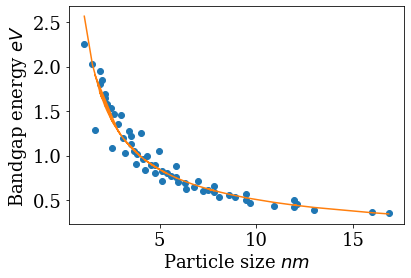

In [12]:
plt.figure()
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

plt.scatter(size, bandgap)
plt.plot(size, np.exp(a0_log) * size ** a1_log, c='C1')

plt.xlabel('Particle size $nm$')
plt.ylabel('Bandgap energy $eV$')

plt.show()

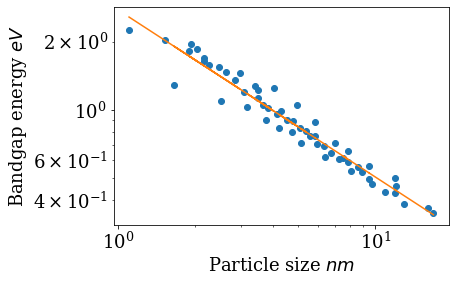

In [13]:
plt.figure()
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

plt.scatter(size, bandgap)
plt.plot(size, np.exp(a0_log) * size ** a1_log, c='C1')

plt.xscale('log')
plt.yscale('log')

plt.xlabel('Particle size $nm$')
plt.ylabel('Bandgap energy $eV$')

plt.show()

In [14]:
a1_log

-0.7381829665032847